In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
# datascience version number of last run of this notebook
version.__version__

'0.3.dev19'

In [2]:
# A simple computational model of a die table containing the dots on each side
die = Table([[1,2,3,4,5,6]],['side'])

In [3]:
die

side
1
2
3
4
5
6


In [4]:
# Simulate the roll of a die by sampling from the die table
def roll_die():
    return die.sample(1)['side'][0]

In [5]:
# roll it.  Try this over and over and see what you get
roll_die()

4

In [6]:
# Simulate rolling it many times, creating a table that records the rolls
num_rolls = 600
rolls = Table([[roll_die() for i in range(num_rolls)]],['roll'])
rolls

roll
1
3
5
1
5
6
2
5
4
3


In [7]:
bins = np.arange(1,8)

The histogram of the rolls shows what we mean by 'uniform at random'.  All sides are equally likely to come up on each roll.  Thus the number of times each comes up in a large number of rolls is nearly constant.  But not quite.
The rolls table it self won't change on its own, but every time you run the cell above, you will get a slightly different picture.

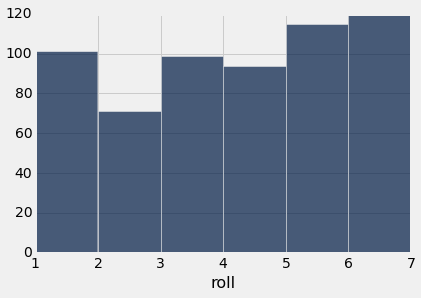

In [8]:
rolls.hist(bins=bins)

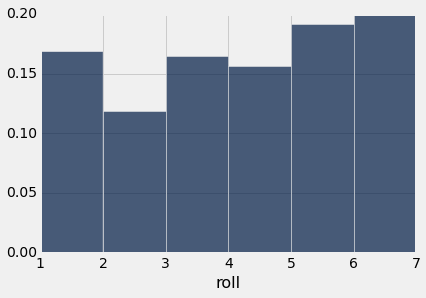

In [9]:
# Normalize this gives a distribution.  The probability of each side appearing.  1/6.
rolls.hist(normed=True,bins=bins)

In [10]:
roll_dist = rolls.bin(normed=True,bins=bins).take(range(6))
roll_dist

bin,roll density
1,0.168333
2,0.118333
3,0.165
4,0.156667
5,0.191667
6,0.2


In [11]:
1/6

0.16666666666666666

In [12]:
# What is the average value of a roll?
np.sum(roll_dist['bin']*roll_dist['roll density'])

3.6850000000000005

In [13]:
np.mean(rolls['roll'])

3.6850000000000001

In [14]:
# Life is about rolling lots of dice.
# Simulate rolling n dice.
def roll(n):
    """Roll n die.  Return a table of the rolls"""
    return die.sample(n, with_replacement=True)

In [15]:
# try it out.  many times
roll(10)

side
4
3
6
4
6
2
1
3
6
1


In [16]:
num_die = 10

In [17]:
num_rolls = 100

In [18]:
# Remember - referencing a column gives an array
roll(num_die)['side']

array([1, 5, 4, 4, 5, 1, 3, 4, 4, 1])

In [19]:
# Simulate rolling num_die dice num_rolls times and build a table of the result
rolls = Table.from_rows([roll(num_die)['side'] for i in range(num_rolls)],["roll_"+str(i) for i in range(num_die)])
rolls

roll_0,roll_1,roll_2,roll_3,roll_4,roll_5,roll_6,roll_7,roll_8,roll_9
2,3,1,4,5,3,3,5,1,6
4,5,4,4,1,4,3,4,6,4
5,4,3,1,5,5,5,5,5,5
2,6,1,3,2,6,3,5,2,6
6,1,1,4,2,1,2,3,2,3
4,5,6,6,4,3,2,5,6,1
3,4,4,5,3,3,3,6,2,2
1,1,5,2,1,2,5,1,4,4
4,3,2,6,5,1,4,3,2,4
1,6,6,5,3,4,6,1,5,3


statistic,10_dice
min,20
max,50
median,36
sum,3579


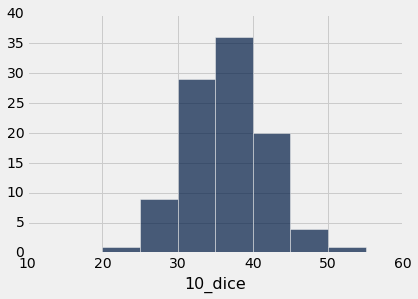

In [20]:
# If we think of each row as a life experience, what is the life like?
label = "{}_dice".format(num_die)
sum_rolls = Table([[np.sum(roll(num_die)['side']) for i in range(num_rolls)]],[label])
sum_rolls.hist(range=[10,6*num_die])
sum_rolls.stats()

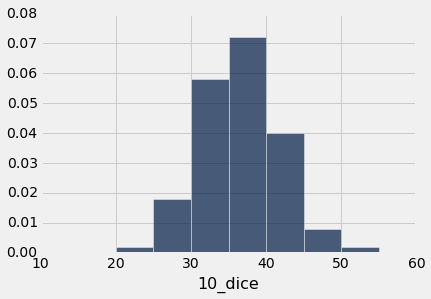

In [21]:
# Or as a distribution
sum_rolls.hist(range=[10,6*num_die],normed=True)

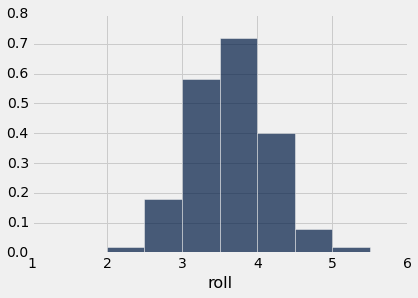

In [22]:
# Normalized for the number of die
Table([sum_rolls[label]/num_die],['roll']).hist(normed=True,range=(1,6))

In probability theory, the central limit theorem (CLT) states that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.